In [1]:
#!pip install numpy pandas seaborn matplotlib plotly scikit-learn kaggle

In [2]:
%%time
# импортируем библиотеки
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

Wall time: 1.89 s


<hr>Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
# import kaggle

# kaggle.api.authenticate()
# kaggle.api.dataset_download_file('uciml/breast-cancer-wisconsin-data', file_name='data.csv',  path='data/')

In [4]:
%%time
# подгружаем данные
strFileNameLocal="data_hw05.csv"
df = pd.read_csv(strFileNameLocal, index_col=0)
df.sample(n=5, random_state=42).T

Wall time: 6 ms


id,87930,859575,8670,907915,921385
diagnosis,B,M,M,B,B
radius_mean,12.47,18.94,15.46,12.4,11.54
texture_mean,18.6,21.31,19.48,17.68,14.44
perimeter_mean,81.09,123.6,101.7,81.47,74.65
area_mean,481.9,1130.0,748.9,467.8,402.9
smoothness_mean,0.09965,0.09009,0.1092,0.1054,0.09984
compactness_mean,0.1058,0.1029,0.1223,0.1316,0.112
concavity_mean,0.08005,0.108,0.1466,0.07741,0.06737
concave points_mean,0.03821,0.07951,0.08087,0.02799,0.02594
symmetry_mean,0.1925,0.1582,0.1931,0.1811,0.1818


In [5]:
rows, columns=df.shape
print(":"*55,
      f"Rows:{rows}, Columns:{columns}",
      f"Nulls in columns\n... {np.round(df.isna().sum()[df.isna().sum()>0] / df.shape[0], 2)}",
      f"\nDuplicated columns:{df.duplicated().sum()}",":"*55,
      sep='\n\n')
display(df.info())

:::::::::::::::::::::::::::::::::::::::::::::::::::::::

Rows:569, Columns:32

Nulls in columns
... Unnamed: 32    1.0
dtype: float64


Duplicated columns:0

:::::::::::::::::::::::::::::::::::::::::::::::::::::::
<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mea

None

<hr>Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [6]:
df.drop(columns=['Unnamed: 32'], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<hr>Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы

Wall time: 1.12 s


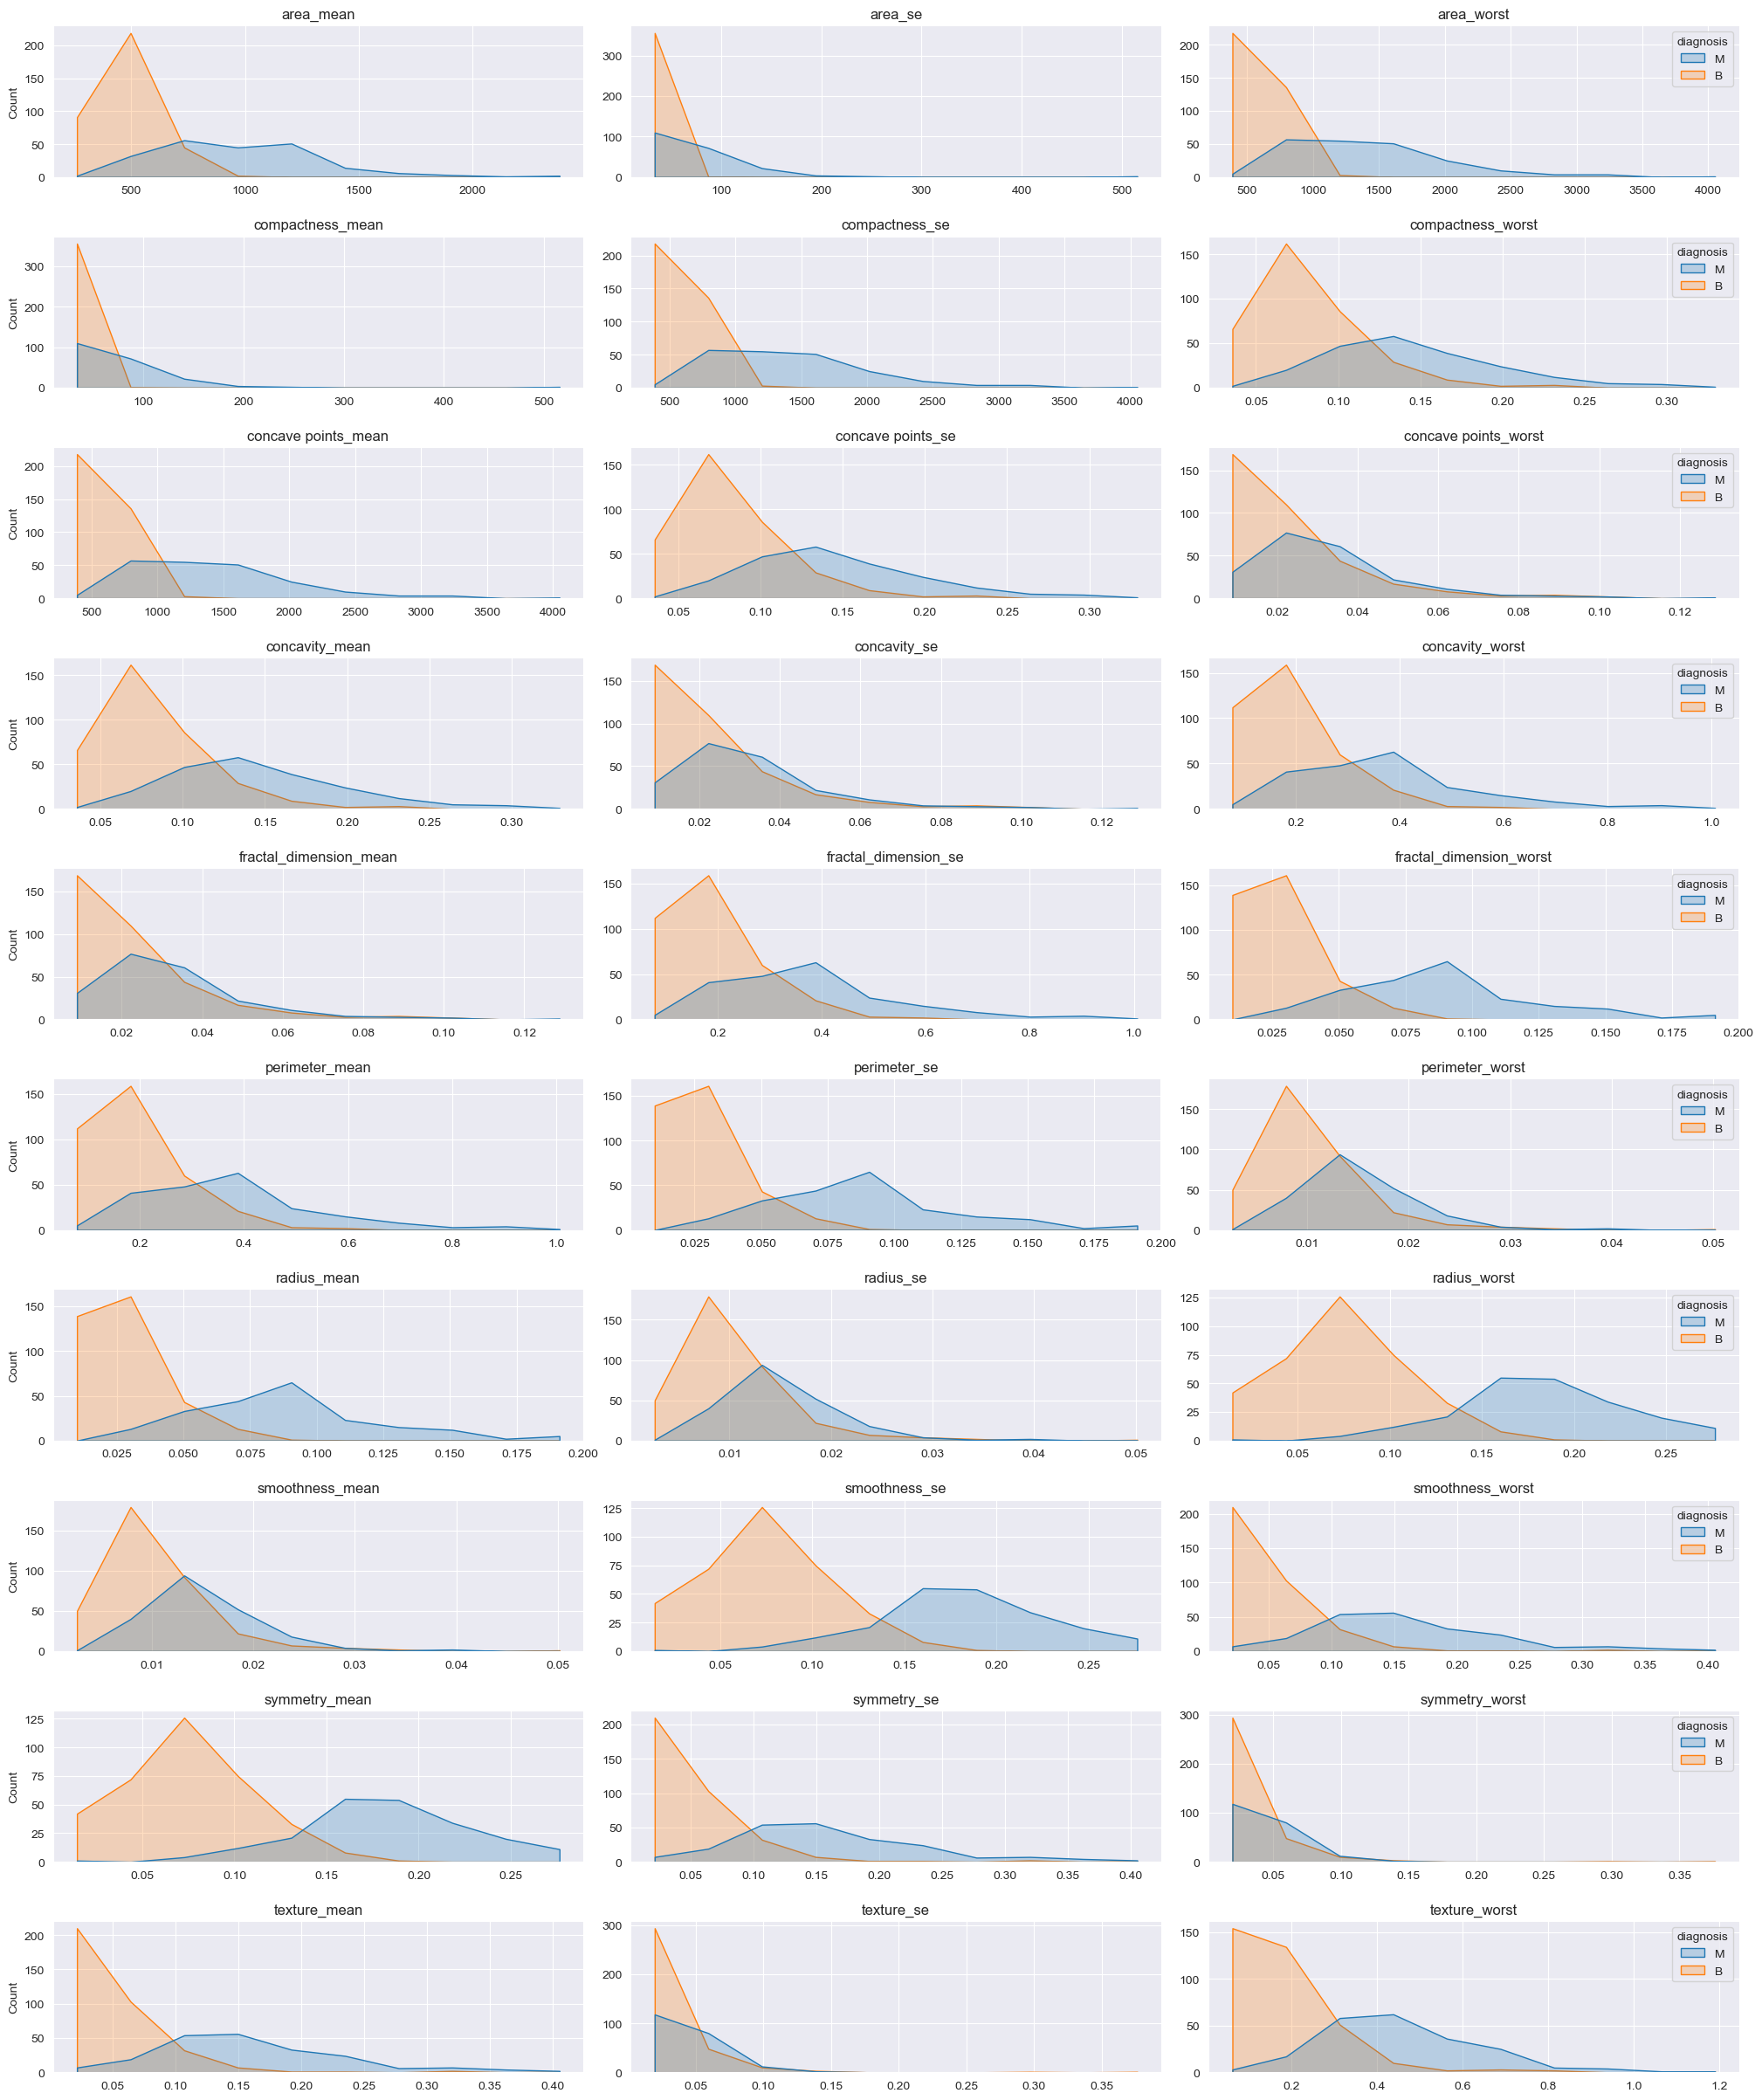

In [7]:
%%time
cols_numeric=sorted(df.select_dtypes(include='number').columns.tolist())
len_c=len(cols_numeric)
cols = [cols_numeric[i:i + 3] for i in range(0, len_c, 3)] # not used

fig, ax = plt.subplots(10, 3, figsize=(20, 24))
fig.tight_layout(h_pad=3)

for i in range(int(len_c/3)):
    for j in range(3):
        sns.histplot(ax=ax[i, j],
                     data=df,
                     hue='diagnosis',
                     x=cols_numeric[i+j],
                     bins=10,
                     element="poly",
                     legend=(j==2))
        ax[i, j].set(xlabel=None, ylabel=(None if j!=0 else 'Count'))
        ax[i, j].set_title(cols_numeric[i*3+j])


<hr>Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

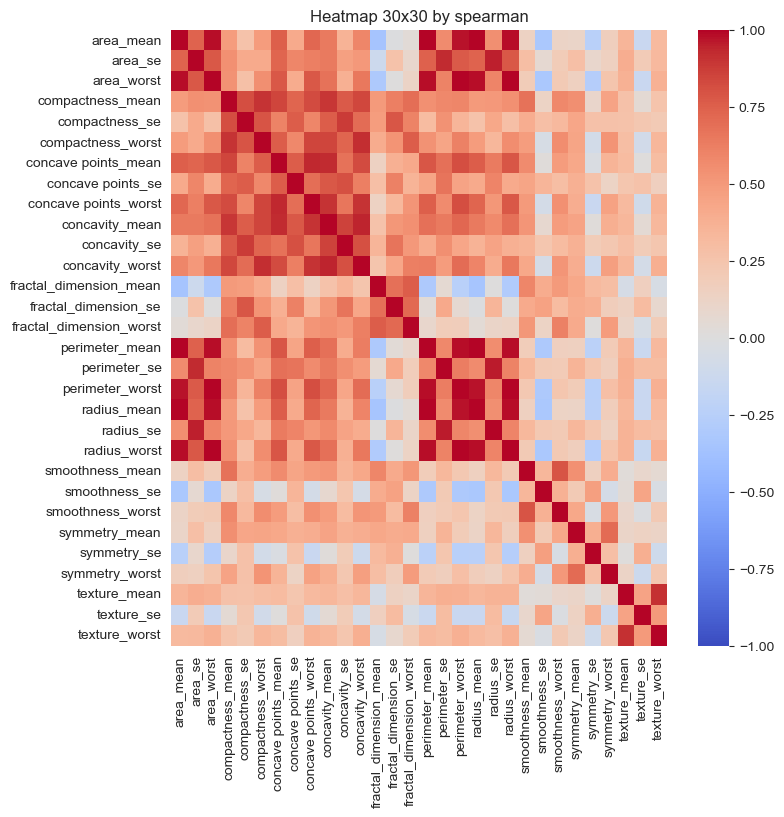

In [8]:
vh_size=8
method='spearman'
sp=len(cols_numeric)
fig, ax = plt.subplots(figsize=(vh_size, vh_size))
sns.heatmap(df[cols_numeric].corr(method=method), cmap=sns.color_palette("coolwarm", 10000), vmin=-1, center=0)
plt.title(f'Heatmap {sp}x{sp} by {method}')
plt.show()

<hr>
<div align="left">
    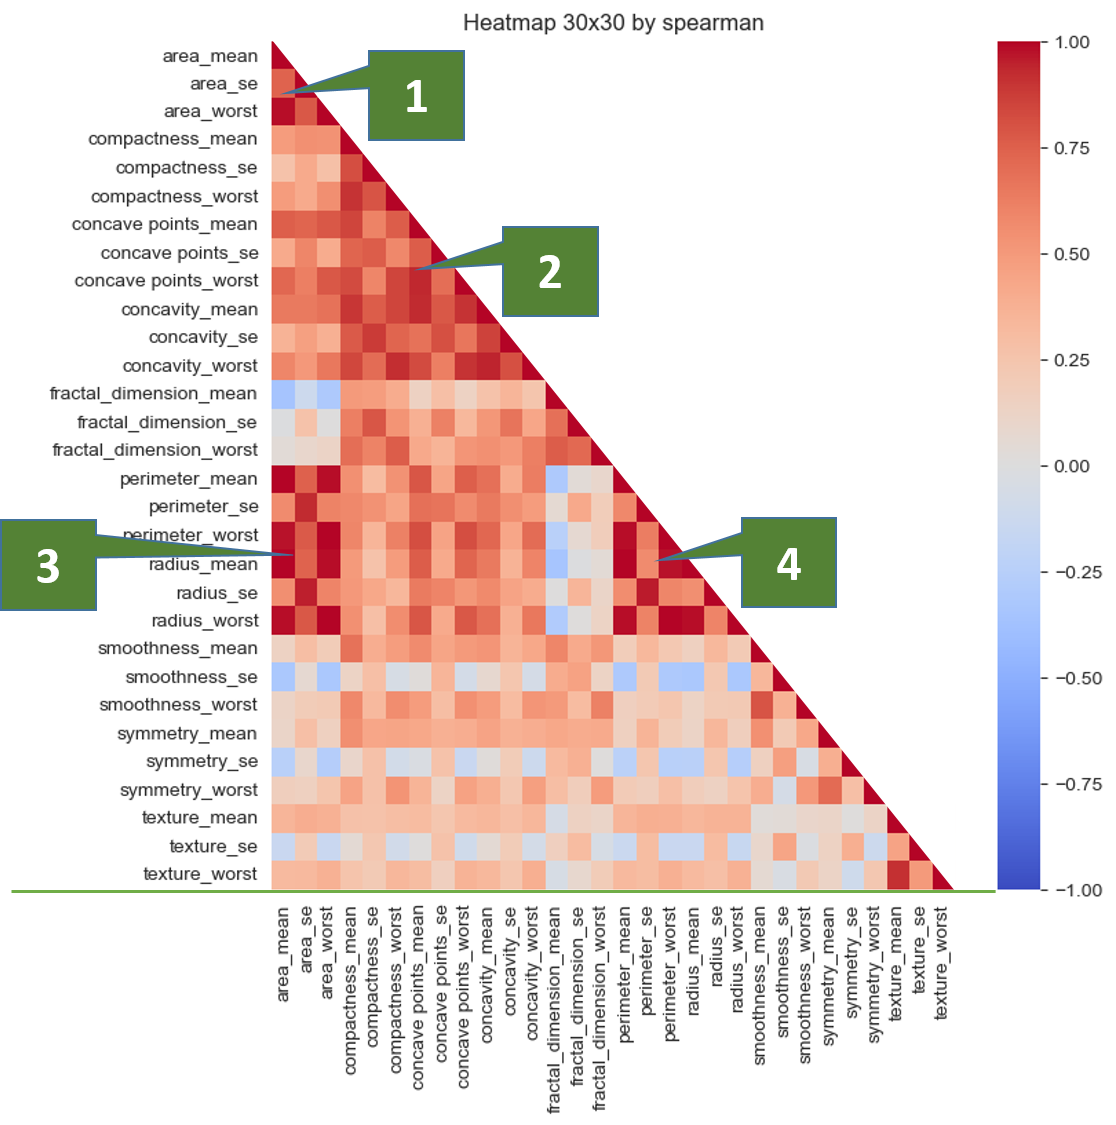
    Result<br>
    <ol>
        <li>area & fractal dimesion inside se-mean-worst</li>
        <li>compactness  <-> concave <-> concavity</li>
        <li>area <-> perimeter, radius</li>
        <li>perimeter <-> radius</li>
    </ol>
</div> 

<hr>Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df=df[cols_numeric], crit=0.85, method='spearman'):    
    au_corr = df.corr(method=method).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr>crit]

crit=0.8
result=get_top_abs_correlations(df=df[cols_numeric], crit=crit)
print(f'Strong correlation (>{crit}): {result.shape[0]} pairs',':'*60, result,sep='\n')

Strong correlation (>0.8): 40 pairs
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
area_mean             radius_mean             0.999602
area_worst            radius_worst            0.998891
perimeter_mean        radius_mean             0.997802
area_mean             perimeter_mean          0.997068
perimeter_worst       radius_worst            0.993548
area_worst            perimeter_worst         0.992433
perimeter_mean        radius_worst            0.981244
area_worst            perimeter_mean          0.980864
area_mean             area_worst              0.980264
                      radius_worst            0.979258
perimeter_mean        perimeter_worst         0.978980
area_worst            radius_mean             0.978863
radius_mean           radius_worst            0.978604
area_mean             perimeter_worst         0.971822
perimeter_worst       radius_mean             0.971555
perimeter_se          radius_se               0.957728
area_se               r

TOP 10 pairs
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


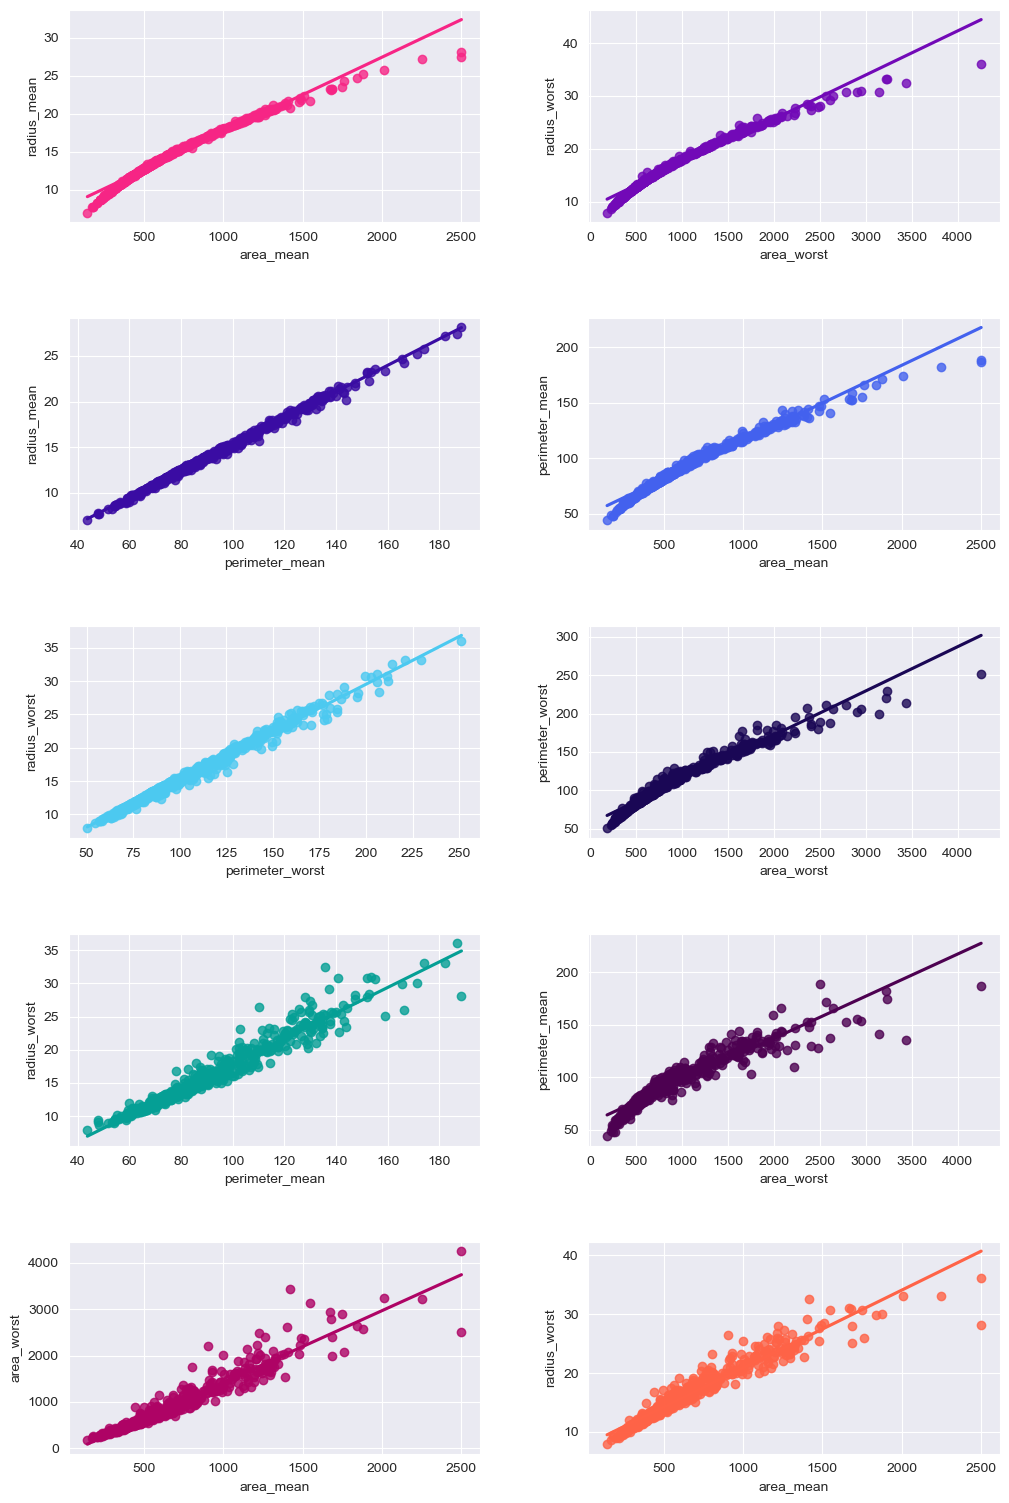

In [10]:
#top-N pairs

target_shape=(5,2)
rows_count, cols_count = target_shape
len_pairs_list= rows_count * cols_count

pairs_list=result.index.tolist()[:len_pairs_list]

palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0", "#1a0755",
           "#059f95","#4d0151","#ae0365","tomato", "darkkhaki", "darkgrey"]

fig, ax = plt.subplots(rows_count, cols_count, figsize=(cols_count*5,rows_count*3))
fig.tight_layout(h_pad=5,w_pad=5)

print(f'TOP {len_pairs_list} pairs',':'*120, sep='\n')

for i in range(len_pairs_list):
    sns.regplot(ax= ax[int(i/cols_count),int(i%cols_count)],
                x = df[pairs_list[i][0]],
                y = df[pairs_list[i][1]],
                ci=None, color=palette[int(i%len(palette))]) 


<hr>Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.
<br>Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

Before normalization
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


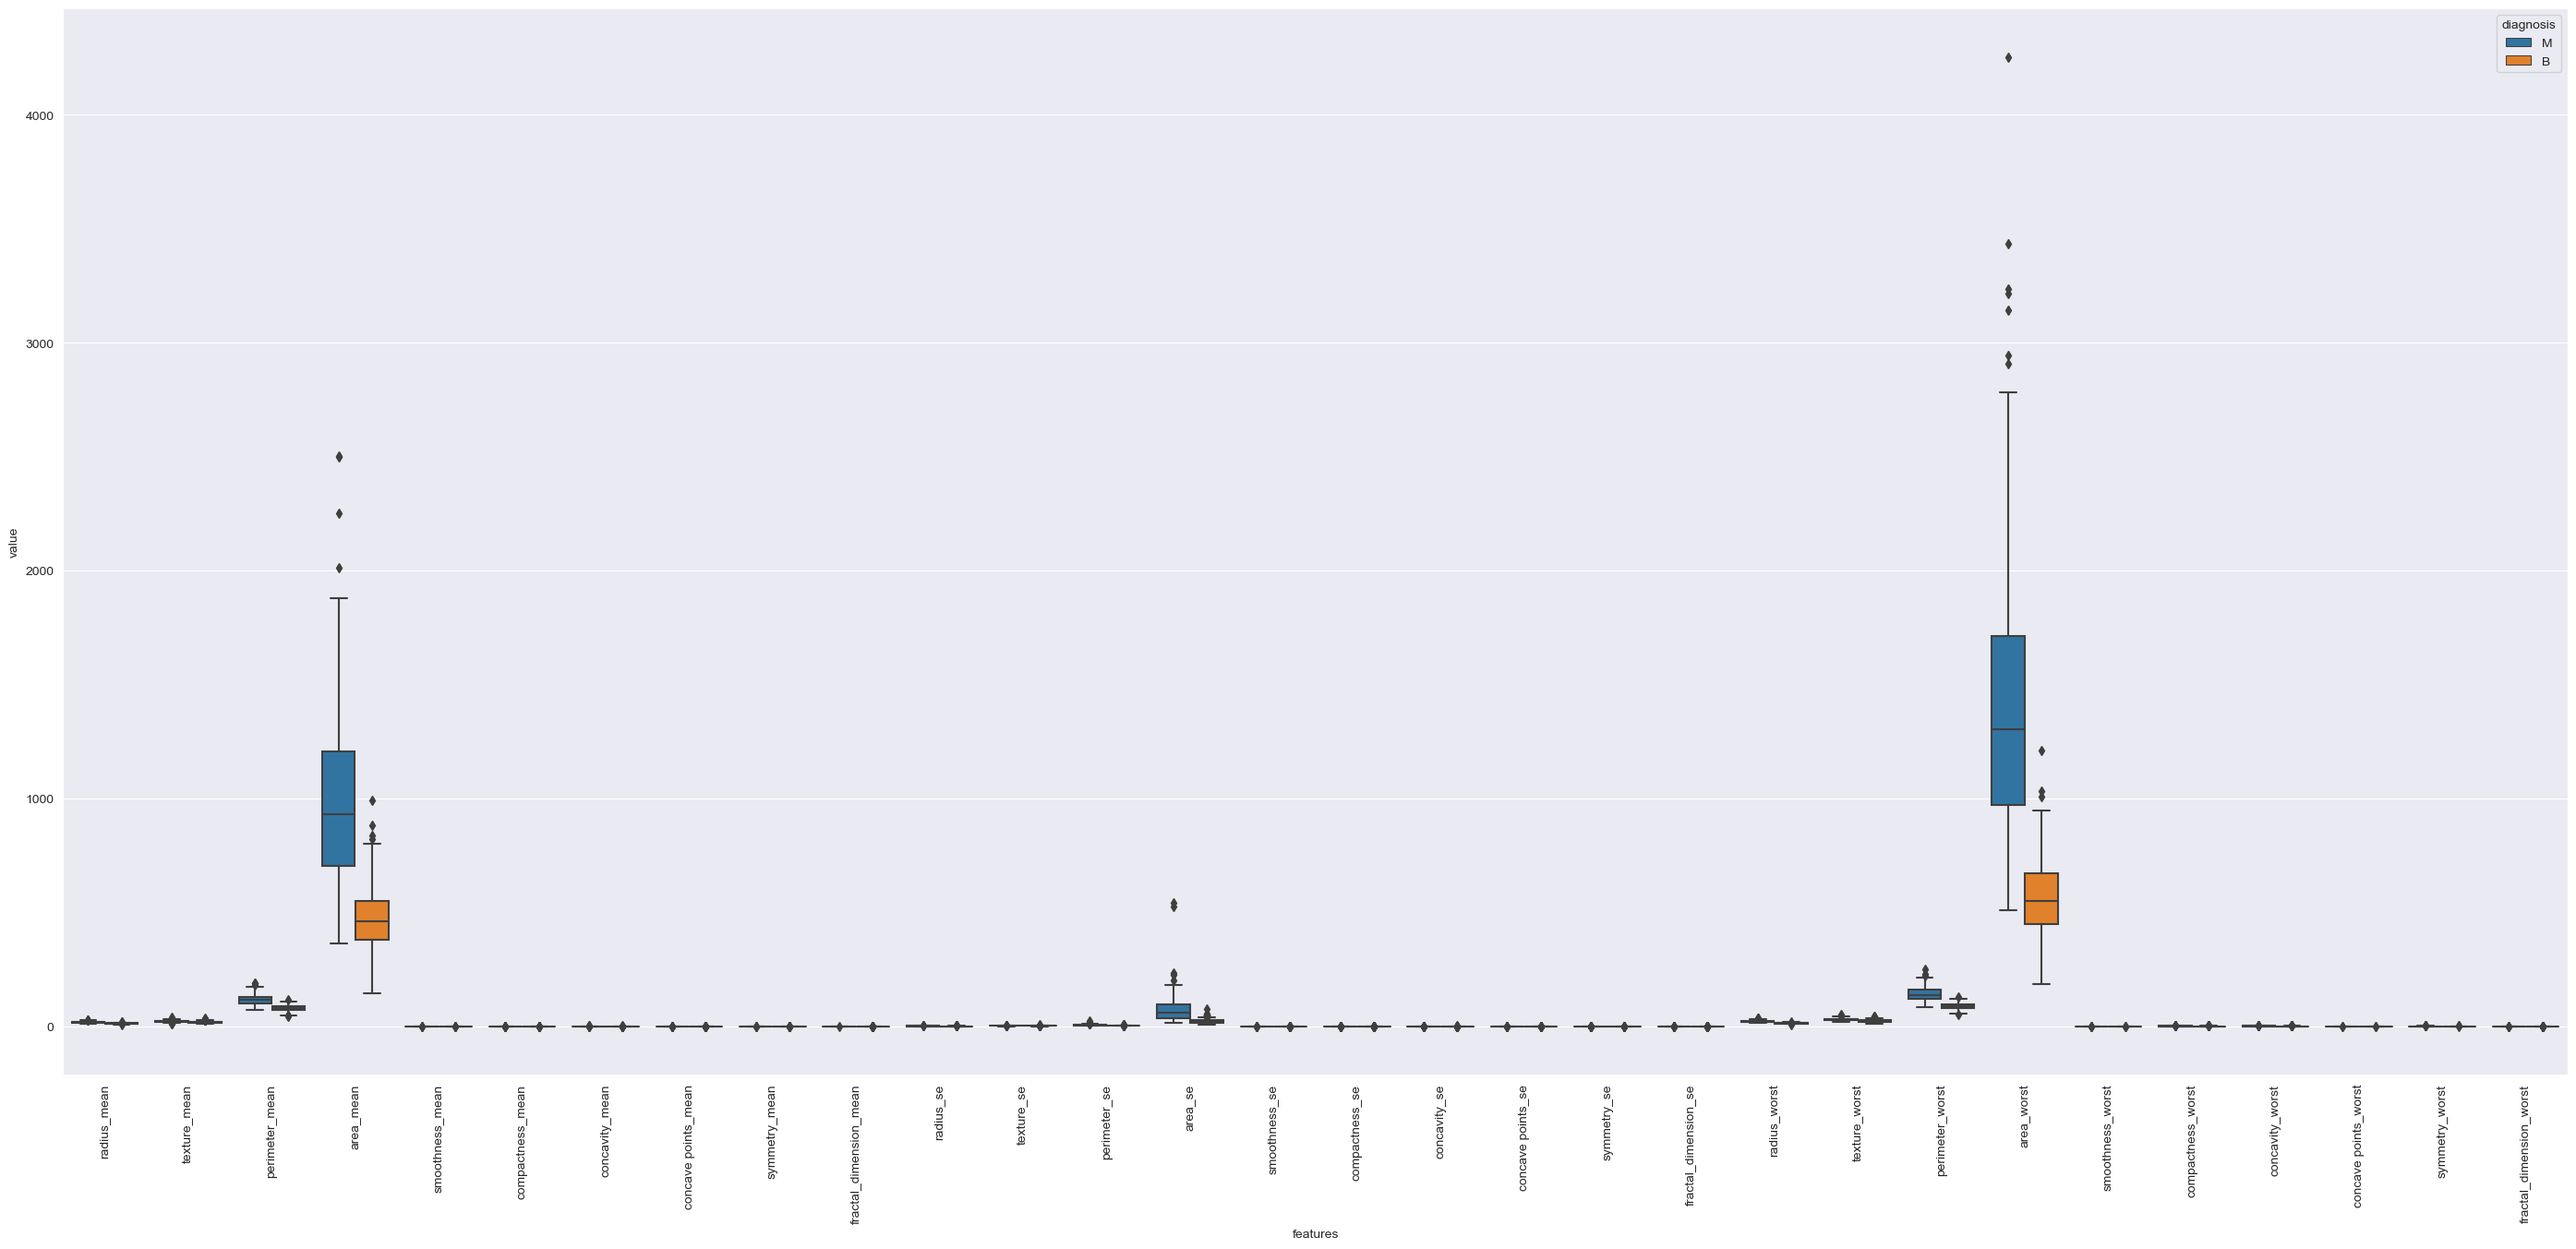

After normalization
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


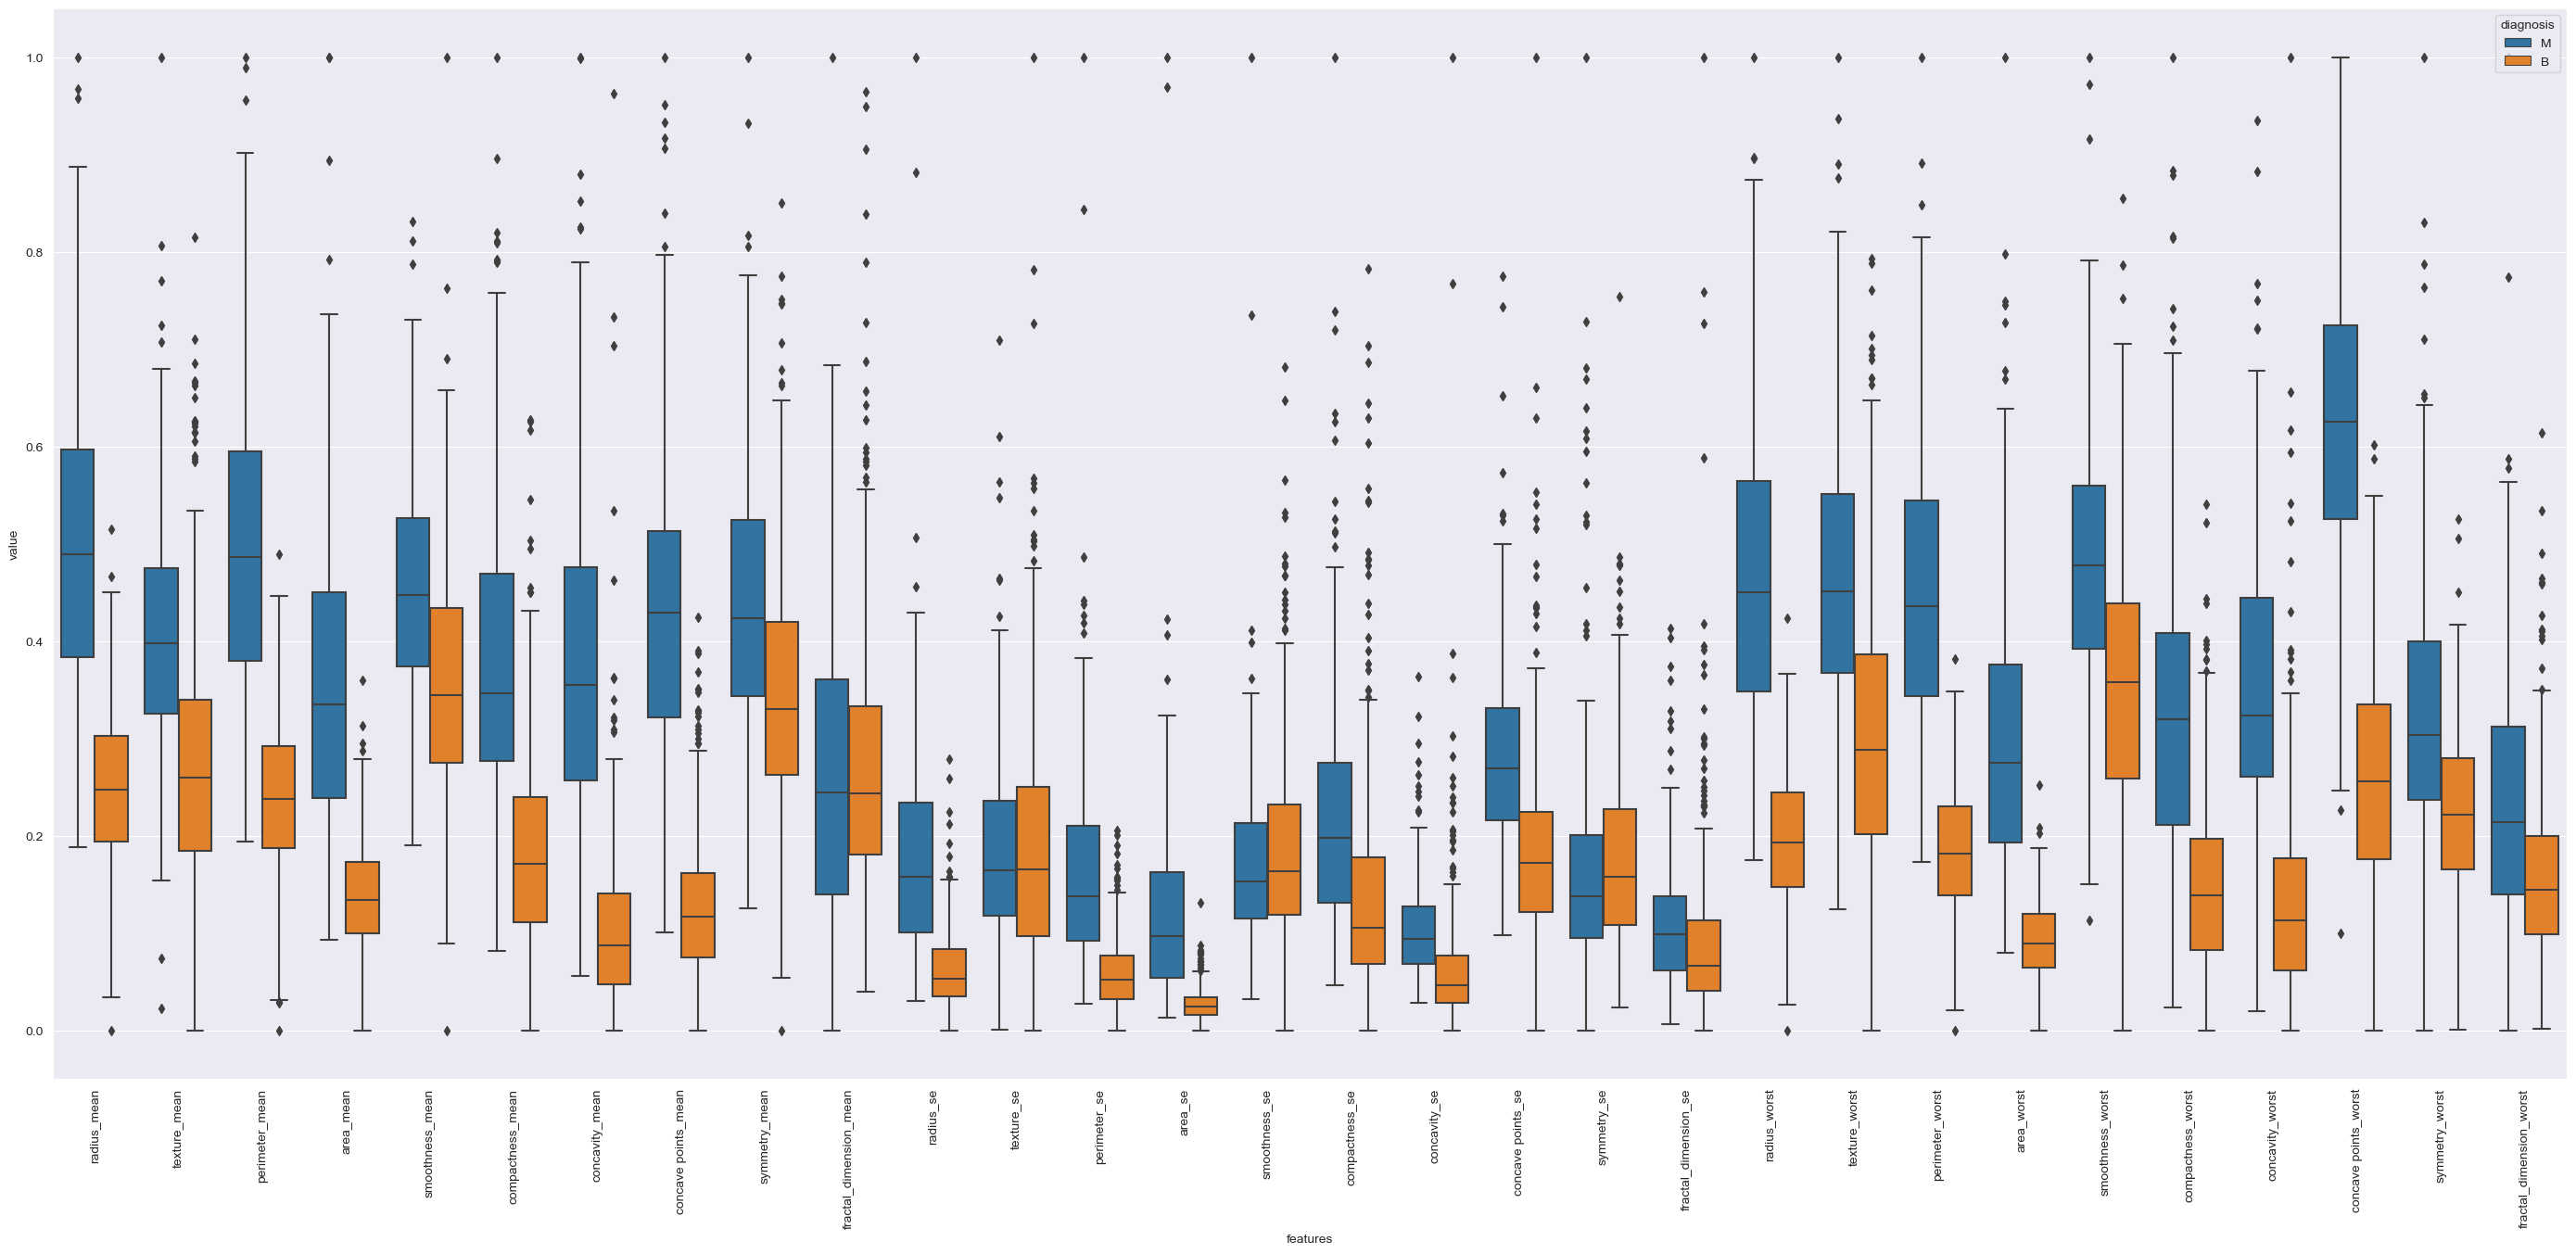

In [11]:
print('Before normalization',':'*120, sep='\n')
data_melted = pd.melt(df, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (35,15))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

print('After normalization',':'*120, sep='\n')
df_norm=df
x = df_norm[cols_numeric]
df_norm[cols_numeric]=(x-x.min())/(x.max()-x.min()) # Simple MinMax

data_melted = pd.melt(df_norm, id_vars = "diagnosis", var_name = "features", value_name = "value")

plt.figure(figsize = (35,15))
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()


In [12]:
target='diagnosis'
X = df.drop(columns=[target])
y = df[target]

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

<hr>
Разбейте данные на train-test, отложив 30% выборки для тестирования.


In [13]:
from sklearn.model_selection import train_test_split
test_size=.3
train_size=1-test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True, random_state=42)

<hr><br>Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score 

results_df=pd.DataFrame()

def metrics_df(results, setname, y_test, y_pred):
    d={
        "set"       : [setname],
        "accuracy"  : [accuracy_score(y_test, y_pred)],
        "precision" : [precision_score(y_test, y_pred)],
        "recall"    : [recall_score(y_test, y_pred)],
        "f1"        : [f1_score(y_test, y_pred)],
        "roc_auc"   : [roc_auc_score(y_test, y_pred)],
    }
    ret_df=pd.concat([results,
                      pd.DataFrame(data=d)],
                     ignore_index=True)
    return ret_df

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
results_df= metrics_df(results_df,"Basic LogisticRegression", y_test, y_pred)

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
results_df= metrics_df(results_df,"LogisticRegression: penalty='l2', C=0.1", y_test, y_pred)

results_df

,set,accuracy,precision,recall,f1,roc_auc
0,Basic LogisticRegression,0.976608,1.0,0.936508,0.967213,0.968254
1,"LogisticRegression: penalty='l2', C=0.1",0.959064,1.0,0.888889,0.941176,0.944444


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results_df= metrics_df(results_df,'Basic KNN: neighbors = 2', y_test, y_pred)

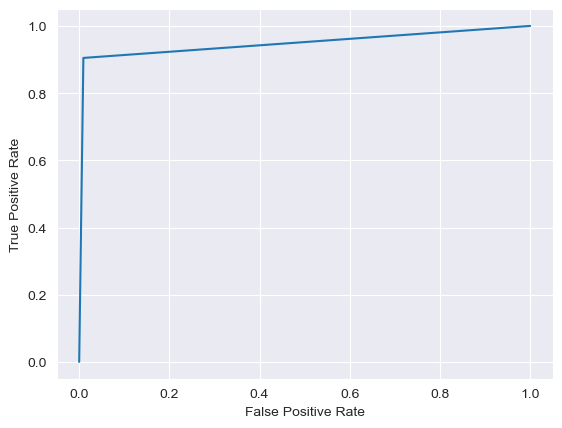

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

#create ROC curve
plt.plot (fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

<br>Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

In [18]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 75, 100]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv = 5, scoring = 'accuracy')
clf.fit(X, y)
print('Best params: ', clf.best_params_)
print('Best accuracy: ', clf.best_score_)

Best params:  {'n_neighbors': 6}
Best accuracy:  0.968390001552554


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results_df= metrics_df(results_df,'KNN Best params: n_neighbors = 6', y_test, y_pred)

In [20]:
print('Final results',':'*100,sep='\n')
results_df.style.background_gradient(cmap = "RdYlGn", vmin = .89, vmax = 1)

Final results
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


,set,accuracy,precision,recall,f1,roc_auc
0,Basic LogisticRegression,0.976608,1.000000,0.936508,0.967213,0.968254
1,"LogisticRegression: penalty='l2', C=0.1",0.959064,1.000000,0.888889,0.941176,0.944444
2,Basic KNN: neighbors = 2,0.959064,0.982759,0.904762,0.942149,0.947751
3,KNN Best params: n_neighbors = 6,0.964912,0.967213,0.936508,0.951613,0.958995


<hr><br>Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
<br>Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.
<br>Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.
<br>Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)
<br>Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

In [21]:
crit=.85
result=get_top_abs_correlations(df=df[cols_numeric], method='pearson', crit=crit)
print(f'Strong correlation (>{crit}): {result.shape[0]} pairs',':'*60, result, sep='\n')

bad_columns = {i for lst in result.index.tolist() for i in lst}
print(f'\n\nDrop {len(pairs_list)} columns:',':'*60,bad_columns, sep='\n')

df1 = df.drop(bad_columns, axis=1)
print(f'\n\nCount of target numeric columns: {len(df1.columns.tolist())-1}',':'*60, sep='\n')

Strong correlation (>0.85): 29 pairs
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
perimeter_mean        radius_mean             0.997855
perimeter_worst       radius_worst            0.993708
area_mean             radius_mean             0.987357
                      perimeter_mean          0.986507
area_worst            radius_worst            0.984015
                      perimeter_worst         0.977578
perimeter_se          radius_se               0.972794
perimeter_mean        perimeter_worst         0.970387
radius_mean           radius_worst            0.969539
perimeter_mean        radius_worst            0.969476
perimeter_worst       radius_mean             0.965137
area_mean             radius_worst            0.962746
                      area_worst              0.959213
                      perimeter_worst         0.959120
area_se               radius_se               0.951830
area_worst            perimeter_mean          0.941550
                      

In [22]:
target='diagnosis'
X = df1.drop(columns=[target])
y = df1[target]

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

test_size=.3
train_size=1-test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True, random_state=42)

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
results_df= metrics_df(results_df,f"LogisticRegression {df1.columns.shape[0]-1} columns: ", y_test, y_pred)

In [24]:
print('Final results',':'*100,sep='\n')
results_df.style.background_gradient(cmap = "RdYlGn", vmin = .8, vmax = 1)

Final results
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


,set,accuracy,precision,recall,f1,roc_auc
0,Basic LogisticRegression,0.976608,1.000000,0.936508,0.967213,0.968254
1,"LogisticRegression: penalty='l2', C=0.1",0.959064,1.000000,0.888889,0.941176,0.944444
2,Basic KNN: neighbors = 2,0.959064,0.982759,0.904762,0.942149,0.947751
3,KNN Best params: n_neighbors = 6,0.964912,0.967213,0.936508,0.951613,0.958995
4,LogisticRegression 13 columns:,0.859649,0.867925,0.730159,0.793103,0.832672
